In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5178387


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5178387/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5178387/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [10]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [12]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [9]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

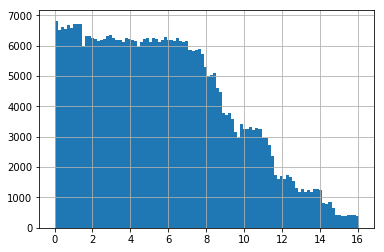

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [19]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [20]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [21]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [22]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [23]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [24]:
qdf=qdf[~qdf['index'].isin({0,16,2,7,14,4,10,1,11,15,9})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((126401, 1), (126401, 100), (126401,))

In [25]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{3: 22721, 5: 20661, 6: 18112, 8: 20285, 12: 22648, 13: 21974}'

In [26]:
quakes=set(qdf['index'])
quakes

{3, 5, 6, 8, 12, 13}

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [28]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [29]:
testX=testdf.values
testX.shape

(2624, 100)

In [30]:
trainX=datadf.values
trainX.shape, qdf.shape

((126401, 100), (126401, 1))

In [31]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a

CPU times: user 15min 41s, sys: 1min 46s, total: 17min 28s
Wall time: 1min 35s


In [32]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 114050, 2624, 3000)

In [33]:
qdf.iloc[topidxs].head()

index
index                    
quake_06_o17988314      6
quake_06_o23373381      6
quake_06_o23373373      6
quake_06_o23382979      6
quake_06_o18021814      6

In [34]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))

In [35]:
idxdf.shape

(3000, 2624)

In [36]:
idxdf.head()

0     1     2     3     4     5     6     7     8     9     ...  2614  \
0     6     6    13     6     8     6     6     8     5     6  ...     6   
1     6     6    13     6     8     6     6    13     3     6  ...     6   
2     6     6    13     6     8     6     6    13     3     6  ...     6   
3     6     6    13     6     8     6     6    13     5     6  ...     6   
4     6     6    13     6     8     6     6    13     5     6  ...     6   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0     5    12     6     6    12     5     5     8     6  
1     5     6     6     6    12     5     5     8     6  
2     5    13     6     6    12     5     5     8     6  
3     5    12     6     6    12     5     5     8     6  
4     5    12     6     6    12     5     5     8     6  

[5 rows x 2624 columns]

In [37]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:1000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.sort_index(ascending=False).cumsum(0)/len(testX),2))

3 5 6 8 12 13 


0                              
qno      3     5     6     8     12    13
index                                    
0.0    0.77  0.06  0.09  0.37  0.73  0.34
0.1    0.10  0.42  0.13  0.29  0.16  0.37
0.2    0.06  0.17  0.11  0.22  0.08  0.21
0.3    0.04  0.15  0.08  0.08  0.02  0.06
0.4    0.02  0.16  0.12  0.03  0.01  0.02
0.5    0.01  0.04  0.08  0.01  0.00  0.00
0.6    0.00  0.00  0.05  0.00   NaN   NaN
0.7    0.00   NaN  0.06   NaN   NaN   NaN
0.8     NaN   NaN  0.09   NaN   NaN   NaN
0.9     NaN   NaN  0.19   NaN   NaN   NaN
1.0     NaN   NaN  0.01   NaN   NaN   NaN

0                              
qno      3     5     6     8     12    13
index                                    
1.0     NaN   NaN  0.01   NaN   NaN   NaN
0.9     NaN   NaN  0.20   NaN   NaN   NaN
0.8     NaN   NaN  0.29   NaN   NaN   NaN
0.7    0.00   NaN  0.35   NaN   NaN   NaN
0.6    0.00  0.00  0.40  0.00   NaN   NaN
0.5    0.01  0.04  0.48  0.01  0.00  0.00
0.4    0.04  0.20  0.60  0.05  0.01  0.02
0.3    0.07  0.35  0.68  0.13  0.03  0.08
0.2    0.13  0.52  0.79  0.35  0.11  0.29
0.1    0.23  0.94  0.91  0.63  0.27  0.66
0.0    1.00  1.00  1.00  1.00  1.00  1.00

In [38]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:2000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))

3 5 6 8 12 13 


0                              
qno      3     5     6     8     12    13
index                                    
0.0    0.73  0.02  0.07  0.30  0.71  0.18
0.1    0.14  0.44  0.14  0.32  0.19  0.52
0.2    0.06  0.21  0.11  0.24  0.07  0.24
0.3    0.04  0.23  0.14  0.09  0.02  0.06
0.4    0.02  0.10  0.10  0.04  0.01  0.01
0.5    0.01  0.01  0.04  0.00  0.00  0.00
0.6    0.00   NaN  0.05   NaN   NaN   NaN
0.7     NaN   NaN  0.07   NaN   NaN   NaN
0.8     NaN   NaN  0.15   NaN   NaN   NaN
0.9     NaN   NaN  0.12   NaN   NaN   NaN

0                              
qno      3     5     6     8     12    13
index                                    
0.0    0.73  0.02  0.07  0.30  0.71  0.18
0.1    0.87  0.46  0.21  0.62  0.90  0.70
0.2    0.93  0.66  0.32  0.87  0.97  0.93
0.3    0.97  0.89  0.46  0.96  0.99  0.99
0.4    0.99  0.99  0.56  1.00  1.00  1.00
0.5    1.00  1.00  0.60  1.00  1.00  1.00
0.6    1.00   NaN  0.66   NaN   NaN   NaN
0.7     NaN   NaN  0.73   NaN   NaN   NaN
0.8     NaN   NaN  0.88   NaN   NaN   NaN
0.9     NaN   NaN  1.00   NaN   NaN   NaN

In [39]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:3000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))   

3 5 6 8 12 13 


0                              
qno      3     5     6     8     12    13
index                                    
0.0    0.72  0.01  0.06  0.24  0.70  0.02
0.1    0.15  0.42  0.15  0.30  0.20  0.68
0.2    0.06  0.25  0.12  0.32  0.07  0.24
0.3    0.04  0.23  0.16  0.11  0.02  0.06
0.4    0.02  0.09  0.07  0.03  0.01  0.00
0.5    0.01  0.00  0.05   NaN  0.00   NaN
0.6    0.00   NaN  0.06   NaN   NaN   NaN
0.7     NaN   NaN  0.09   NaN   NaN   NaN
0.8     NaN   NaN  0.23   NaN   NaN   NaN
0.9     NaN   NaN  0.00   NaN   NaN   NaN

0                              
qno      3     5     6     8     12    13
index                                    
0.0    0.72  0.01  0.06  0.24  0.70  0.02
0.1    0.87  0.43  0.21  0.55  0.90  0.70
0.2    0.93  0.68  0.33  0.86  0.97  0.94
0.3    0.97  0.91  0.49  0.97  0.99  1.00
0.4    0.99  1.00  0.56  1.00  1.00  1.00
0.5    1.00  1.00  0.61   NaN  1.00   NaN
0.6    1.00   NaN  0.67   NaN   NaN   NaN
0.7     NaN   NaN  0.76   NaN   NaN   NaN
0.8     NaN   NaN  1.00   NaN   NaN   NaN
0.9     NaN   NaN  1.00   NaN   NaN   NaN

In [40]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

3      425994
5     1544222
6     3411403
8     1113316
12     373425
13    1003640
Name: index, dtype: int64

In [41]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

3     19613
5     20405
6     15956
8     19320
12    18781
13    19975
Name: index, dtype: int64

In [42]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((114050, 1), (114050, 100), (114050,))

In [43]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [44]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [45]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  3 3 (nan, nan)
valid quake 5 train quake 3
(19613, 100) (19613,) (20405, 100) (20405,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.791487	valid_1's l1: 1.11196
[100]	training's l1: 0.50599	valid_1's l1: 1.13166
[150]	training's l1: 0.355437	valid_1's l1: 1.16631
[200]	training's l1: 0.272677	valid_1's l1: 1.19031
[250]	training's l1: 0.228602	valid_1's l1: 1.20252
Early stopping, best iteration is:
[57]	training's l1: 0.736451	valid_1's l1: 1.10802
quake  3 5 (1.1080175694335674, 57)
valid quake 6 train quake 3
(19613, 100) (19613,) (15956, 100) (15956,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.791487	valid_1's l1: 1.07452
[100]	training's l1: 0.50599	valid_1's l1: 1.06251
[150]	training's l1: 0.355437	valid_1's l1: 1.08194
[200]	training's l1: 0.272677	valid_1's l1: 1.09422
[250]	training's l1: 0.228602	valid_1's l1: 1.10086
Early stopping, best iteration is:
[82]	training's l1: 0.585454	valid_

[550]	training's l1: 0.136439	valid_1's l1: 1.08079
[600]	training's l1: 0.131594	valid_1's l1: 1.07939
[650]	training's l1: 0.127488	valid_1's l1: 1.07875
[700]	training's l1: 0.123635	valid_1's l1: 1.07709
[750]	training's l1: 0.12023	valid_1's l1: 1.07511
[800]	training's l1: 0.11705	valid_1's l1: 1.07291
[850]	training's l1: 0.114237	valid_1's l1: 1.0716
[900]	training's l1: 0.11155	valid_1's l1: 1.06984
[950]	training's l1: 0.109112	valid_1's l1: 1.06887
[1000]	training's l1: 0.106852	valid_1's l1: 1.06763
[1050]	training's l1: 0.104764	valid_1's l1: 1.06726
[1100]	training's l1: 0.102716	valid_1's l1: 1.06579
[1150]	training's l1: 0.100666	valid_1's l1: 1.0641
[1200]	training's l1: 0.0988102	valid_1's l1: 1.06298
[1250]	training's l1: 0.0970376	valid_1's l1: 1.06266
[1300]	training's l1: 0.0954161	valid_1's l1: 1.06194
[1350]	training's l1: 0.0938525	valid_1's l1: 1.06162
[1400]	training's l1: 0.0923375	valid_1's l1: 1.06074
[1450]	training's l1: 0.0907559	valid_1's l1: 1.05968
[

[300]	training's l1: 0.196999	valid_1's l1: 1.10468
[350]	training's l1: 0.181257	valid_1's l1: 1.10808
Early stopping, best iteration is:
[171]	training's l1: 0.304031	valid_1's l1: 1.1
quake  8 12 (1.1000044818117871, 171)
valid quake 13 train quake 8
(19320, 100) (19320,) (19975, 100) (19975,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.749129	valid_1's l1: 1.19247
[100]	training's l1: 0.488318	valid_1's l1: 1.11355
[150]	training's l1: 0.344491	valid_1's l1: 1.09235
[200]	training's l1: 0.263876	valid_1's l1: 1.08782
[250]	training's l1: 0.221217	valid_1's l1: 1.08592
[300]	training's l1: 0.196999	valid_1's l1: 1.08541
[350]	training's l1: 0.181257	valid_1's l1: 1.08673
[400]	training's l1: 0.168479	valid_1's l1: 1.08719
[450]	training's l1: 0.159239	valid_1's l1: 1.08807
Early stopping, best iteration is:
[284]	training's l1: 0.203707	valid_1's l1: 1.08491
quake  8 13 (1.0849116508413943, 284)
valid quake 3 train quake 12
(18781, 100) (1878

[100]	training's l1: 0.545407	valid_1's l1: 0.846182
[150]	training's l1: 0.40159	valid_1's l1: 0.788097
[200]	training's l1: 0.323709	valid_1's l1: 0.765861
[250]	training's l1: 0.28221	valid_1's l1: 0.75742
[300]	training's l1: 0.256383	valid_1's l1: 0.754547
[350]	training's l1: 0.237819	valid_1's l1: 0.753201
[400]	training's l1: 0.223288	valid_1's l1: 0.752263
[450]	training's l1: 0.210848	valid_1's l1: 0.752565
[500]	training's l1: 0.200498	valid_1's l1: 0.752577
[550]	training's l1: 0.191608	valid_1's l1: 0.75369
[600]	training's l1: 0.183972	valid_1's l1: 0.755063
Early stopping, best iteration is:
[406]	training's l1: 0.221701	valid_1's l1: 0.752018
quake  13 12 (0.7520183117727004, 406)
quake  13 13 (nan, nan)


In [46]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [47]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [48]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [49]:
pvdf.style.apply(highlight_max,axis=1)

In [50]:
pvdf.style.apply(highlight_min,axis=1)

In [51]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))

In [56]:
a=np.random.random(100000)*9.5
print np.median(a)
print np.mean(np.abs(a-np.median(a)))

4.761730347578708
2.3678298086628953


In [65]:
a1=np.random.random(100000)*4.6
a2=np.random.random(100000)*4.6
a3=np.random.random(int(100000*5/4.6))*5+4.6
a=np.concatenate([a1,a2,a3])
print np.median(a)
print np.mean(np.abs(a-np.median(a)))

3.546522686623723
2.212845133956825
